# Roy

This is for me to test around and write some functions out for the class, you can create your own notebook and test around if needed. The main notebook will be `StatArb.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.decomposition import PCA
from Factors import Factors
from StatArbStrategy import StatArbStrategy
from Trade import Trade

In [2]:
start="2021-09-26 00:00:00"
finish="2021-09-27 00:00:00"

In [3]:
trading_signals = {}
hourly_returns = {}

In [4]:
date_range = pd.date_range(start, finish, freq='H')
date_range.shape

(25,)

In [5]:
for d in date_range:
    start_time = d
    arb = StatArbStrategy(window=240, start=d, finish=finish)

    params = arb.get_params()
    s = arb.get_s_score(params)

    # get trading signals with a certain start time and their returns
    trading_signals[start_time] = arb.generate_trading_signals(s)
    # hourly_returns[start_time] = arb.hourly_returns

In [6]:
trading_signals = pd.DataFrame.from_dict(trading_signals, orient='index')
trading_signals

,BTC,BNB,XRP,SOL,DOGE,LINK,UNI,LTC,BCH,MATIC,...,AUDIO,BNT,ZRX,DYDX,RAY,PERP,SAND,C98,CRO,HNT
2021-09-26 00:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,STO,CSP,CSP,CSP,CSP,CSP,CSP,NaN,NaN
2021-09-26 01:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,CSP,STO,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 02:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 03:00:00,CSP,CSP,CLP,CSP,CSP,STO,CLP,CSP,CSP,STO,...,BTO,CLP,CSP,CSP,CSP,CLP,CSP,CSP,NaN,NaN
2021-09-26 04:00:00,CSP,CSP,CLP,CSP,CSP,STO,CLP,STO,CSP,CLP,...,BTO,CLP,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 05:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 06:00:00,CSP,CSP,CSP,CSP,CSP,STO,CLP,CLP,CSP,CSP,...,BTO,CLP,CSP,CSP,CSP,CLP,NaN,NaN,CSP,CSP
2021-09-26 07:00:00,CSP,CSP,CSP,CSP,CSP,STO,CLP,CSP,CSP,CSP,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 08:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CSP,CSP,CLP,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP
2021-09-26 09:00:00,CSP,CSP,CLP,CSP,CSP,STO,STO,CLP,CSP,STO,...,BTO,STO,CSP,CSP,CSP,CSP,NaN,NaN,CSP,CSP


In [19]:
def get_ret(df, start, finish):
    a = df.loc[start]
    b = df.loc[finish]
    return pd.concat([a, b], axis=1).T.pct_change()[1:]

In [9]:
def map_signal_to_trade(current_signal, previous_signal, previous_signal_value, current_date, previous_date):
    open_positions=pd.DataFrame()
    closed_positions = pd.DataFrame()

    ret_df = get_ret(arb.prices_df, previous_date, current_date)
    ret_df = ret_df.loc[:, current_signal.index]

    # if no change in signal
    if current_signal == previous_signal:
        current_position = previous_signal_value
        open_positions.loc[current_date, 'Return'] = current_position@ret_df
    else:
        current_position = 0 # close previous position
        if current_signal == "BTO":
            current_position = 1
        elif current_signal == "STO":
            current_position = -1
    return current_position, open_positions, closed_positions

In [31]:
ret_df = get_ret(arb.prices_df, previous_signal.name, current_line.name)
ret_df = ret_df.loc[:, current_line.index]

In [26]:
current_line = trading_signals.iloc[1].copy(deep=True)
previous_signal = trading_signals.iloc[0].copy(deep=True)

In [ ]:
d = {}
d['STOCK'] = {"TIME": weight}

In [36]:
ts = pd.DataFrame(np.where(trading_signals=="BTO", 1, np.where(trading_signals=="STO", -1, 0)), index=trading_signals.index, columns=trading_signals.columns)

In [62]:
ts

,BTC,BNB,XRP,SOL,DOGE,LINK,UNI,LTC,BCH,MATIC,...,AUDIO,BNT,ZRX,DYDX,RAY,PERP,SAND,C98,CRO,HNT
2021-09-26 00:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 01:00:00,0,0,0,0,0,-1,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
2021-09-26 02:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 03:00:00,0,0,0,0,0,-1,0,0,0,-1,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 04:00:00,0,0,0,0,0,-1,0,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 05:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 06:00:00,0,0,0,0,0,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2021-09-26 07:00:00,0,0,0,0,0,-1,0,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 08:00:00,0,0,0,0,0,-1,-1,0,0,0,...,1,-1,0,0,0,0,0,0,0,0
2021-09-26 09:00:00,0,0,0,0,0,-1,-1,0,0,-1,...,1,-1,0,0,0,0,0,0,0,0


In [61]:
def get_ret(df, start, finish):
    # a = df.loc[start]
    # b = df.loc[finish]
    # return pd.concat([a, b], axis=1).T.pct_change()[1:]
    return df.loc[start:finish].pct_change()[1:]

In [49]:
ret_df = get_ret(arb.prices_df, start, finish)
ret_df = ret_df.loc[:, ts.columns].shift(-1)

<AxesSubplot:>

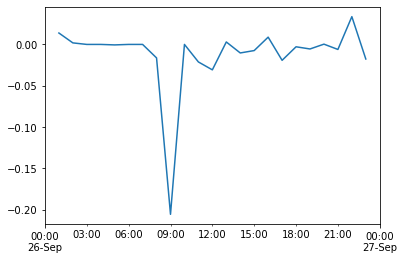

In [57]:
weighted_ret = ts * ret_df
weighted_ret['UNI'].plot()

In [4]:
weighted_ret

NameError: name 'weighted_ret' is not defined

In [ ]:
ts = pd.DataFrame(np.where(trading_signals=="BTO", 1, np.where(trading_signals=="STO", -1, 0)), index=trading_signals.index, columns=trading_signals.columns)

open_positions={}
closed_positions = {}
df = pd.DataFrame()
for i,j in enumerate(trading_signals.index):
    current_line = trading_signals.iloc[i].copy(deep=True)
    previous_signal = trading_signals.iloc[i-1].copy(deep=True)

    ret_df = get_ret(arb.prices_df, previous_signal.name, current_line.name)
    ret_df = ret_df.loc[:, current_signal.index]

    for ticker in current_line.index:
        if ticker in open_positions:
            if i == 0:
                current_line_applied = current_line[ticker].apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
                previous_signal_value = current_line_applied
                open_positions = current_line_applied[current_line_applied.isin([-1, 1])].to_dict()

            else:
                previous_signal = trading_signals.iloc[i-1].copy(deep=True)
                current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal[ticker], previous_signal_value=previous_signal_value[ticker])
                previous_signal_value = current_line_applied
        else:
            if i == 0:
                current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
                previous_signal_value = current_line_applied
                open_positions = current_line_applied[current_line_applied.isin([-1, 1])].to_dict()

            else:
                previous_signal = trading_signals.iloc[i-1].copy(deep=True)
                current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal[ticker], previous_signal_value=previous_signal_value[ticker])
                previous_signal_value = current_line_applied

In [33]:
current_line_applied@

BTC      0
BNB      0
XRP      0
SOL      0
DOGE     0
LINK    -1
UNI     -1
LTC      0
BCH      0
MATIC    0
FTT     -1
TRX     -1
AXS      0
SHIB     0
AAVE    -1
OKB      1
GRT     -1
FTM      0
CEL      0
MKR      0
COMP     0
SUSHI   -1
SNX      0
HT       1
CHZ      0
OMG      0
ENJ      0
YFI     -1
SRM      0
BAT      0
CRV      0
REN     -1
AUDIO    1
BNT     -1
ZRX      0
DYDX     0
RAY      0
PERP     0
SAND     0
C98      0
CRO      0
HNT      0
Name: 2021-09-26 00:00:00, dtype: int64

In [15]:
current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))

In [32]:
d = current_line_applied[current_line_applied.isin([-1, 1])]
d

LINK    -1
UNI     -1
FTT     -1
TRX     -1
AAVE    -1
OKB      1
GRT     -1
SUSHI   -1
HT       1
YFI     -1
REN     -1
AUDIO    1
BNT     -1
Name: 2021-09-26 00:00:00, dtype: int64

In [24]:
d['LINK'] = {"Ticker": "LINK", "Position": d['LINK'], "Return":}

-1

In [10]:
df = pd.DataFrame()
for i,j in enumerate(trading_signals.index):
    current_line = trading_signals.iloc[i].copy(deep=True)
    if i == 0:
        current_line_applied = current_line.apply(lambda x: 1 if x == "BTO" else (-1 if x == "STO" else 0))
        previous_signal_value = current_line_applied
    else:
        previous_signal = trading_signals.iloc[i-1].copy(deep=True)
        current_line_applied = current_line.apply(map_signal_to_trade, previous_signal=previous_signal, previous_signal_value=previous_signal_value)
        previous_signal_value = current_line_applied

    df.loc[j, current_line_applied.index] = current_line_applied

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,1INCH,AAVE,AGLD,ALCX,ALGO,ALICE,ALPHA,AMPL,APE,ASD,...,TRU,TRX,TRYB,UNI,WAVES,XAUT,XRP,YFI,YFII,ZRX
startTime,,,,,,,,,,,,,,,,,,,,,
2021-09-26,-0.001323,-0.005222,-0.017925,-0.002537,NaN,-0.002271,-0.002985,0.002987,NaN,0.002552,...,-0.006105,-0.002424,0.000713,-0.002357,0.000824,-0.006935,0.001277,-0.00132,-0.000929,0.00443


In [17]:
current_line_applied.to_dict()

{'BTC': 0,
 'BNB': 0,
 'XRP': 0,
 'SOL': 0,
 'DOGE': 0,
 'LINK': -1,
 'UNI': -1,
 'LTC': 0,
 'BCH': 0,
 'MATIC': 0,
 'FTT': -1,
 'TRX': -1,
 'AXS': 0,
 'SHIB': 0,
 'AAVE': -1,
 'OKB': 1,
 'GRT': -1,
 'FTM': 0,
 'CEL': 0,
 'MKR': 0,
 'COMP': 0,
 'SUSHI': -1,
 'SNX': 0,
 'HT': 1,
 'CHZ': 0,
 'OMG': 0,
 'ENJ': 0,
 'YFI': -1,
 'SRM': 0,
 'BAT': 0,
 'CRV': 0,
 'REN': -1,
 'AUDIO': 1,
 'BNT': -1,
 'ZRX': 0,
 'DYDX': 0,
 'RAY': 0,
 'PERP': 0,
 'SAND': 0,
 'C98': 0,
 'CRO': 0,
 'HNT': 0}

# Break

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.decomposition import PCA
from Factors import Factors
from StatArbStrategy import StatArbStrategy
from Trade import Trade

In [2]:
start="2021-09-26 00:00:00"
finish="2021-09-26 23:00:00"

In [3]:
trade = Trade(window=240, start=start, finish=finish)

2021-09-26 00:00:00
2021-09-26 01:00:00
2021-09-26 02:00:00
2021-09-26 03:00:00
2021-09-26 04:00:00
2021-09-26 05:00:00
2021-09-26 06:00:00
2021-09-26 07:00:00
2021-09-26 08:00:00
2021-09-26 09:00:00
2021-09-26 10:00:00
2021-09-26 11:00:00
2021-09-26 12:00:00
2021-09-26 13:00:00
2021-09-26 14:00:00
2021-09-26 15:00:00
2021-09-26 16:00:00
2021-09-26 17:00:00
2021-09-26 18:00:00
2021-09-26 19:00:00
2021-09-26 20:00:00
2021-09-26 21:00:00
2021-09-26 22:00:00
2021-09-26 23:00:00


<AxesSubplot:>

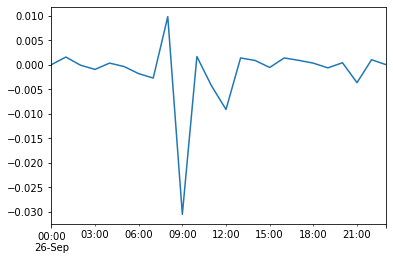

In [5]:
trade.portfolio_ret.plot()

In [9]:
trade.prices_df / trade.prices_df.sum(axis=0)

,1INCH,AAVE,AGLD,ALCX,ALGO,ALICE,ALPHA,AMPL,APE,ASD,...,TRU,TRX,TRYB,UNI,WAVES,XAUT,XRP,YFI,YFII,ZRX
startTime,,,,,,,,,,,,,,,,,,,,,
2021-09-26 00:00:00,0.040652,0.040623,0.046225,0.041658,NaN,0.042516,0.041991,0.042079,NaN,0.043078,...,0.043337,0.042865,0.041714,0.037547,0.042968,0.041487,0.041958,0.042097,0.042889,0.042851
2021-09-26 01:00:00,0.039701,0.040049,0.044693,0.040898,NaN,0.041537,0.041374,0.041650,NaN,0.042904,...,0.042243,0.042282,0.041621,0.036748,0.041687,0.041487,0.041449,0.041249,0.041908,0.041740
2021-09-26 02:00:00,0.039055,0.039490,0.043013,0.040863,NaN,0.040903,0.040973,0.041524,NaN,0.042909,...,0.041776,0.041854,0.041744,0.036241,0.041453,0.041705,0.041442,0.040762,0.041485,0.041339
2021-09-26 03:00:00,0.038231,0.039274,0.043043,0.040598,NaN,0.040225,0.040556,0.040965,NaN,0.042324,...,0.040956,0.041605,0.041744,0.036174,0.040951,0.041705,0.041073,0.040588,0.040424,0.041067
2021-09-26 04:00:00,0.038615,0.039510,0.043309,0.040775,NaN,0.040655,0.040960,0.041238,NaN,0.042314,...,0.041083,0.041838,0.041804,0.036735,0.041169,0.041705,0.041346,0.040804,0.040857,0.041280
2021-09-26 05:00:00,0.038778,0.039527,0.044301,0.040263,NaN,0.041193,0.041081,0.040808,NaN,0.042122,...,0.041442,0.041723,0.041662,0.036430,0.041261,0.041632,0.041225,0.040748,0.040879,0.041126
2021-09-26 06:00:00,0.038509,0.039366,0.043739,0.040298,NaN,0.041043,0.041281,0.040705,NaN,0.042159,...,0.041191,0.041654,0.041588,0.036452,0.041039,0.041857,0.041059,0.040623,0.040852,0.040937
2021-09-26 07:00:00,0.037983,0.038972,0.042303,0.040069,NaN,0.040505,0.040729,0.040705,NaN,0.042186,...,0.040924,0.041422,0.041733,0.036103,0.041021,0.041857,0.040891,0.039921,0.040466,0.040677
2021-09-26 08:00:00,0.036747,0.038024,0.037226,0.039415,NaN,0.038602,0.039181,0.040199,NaN,0.041705,...,0.039102,0.039934,0.041469,0.034774,0.039344,0.041463,0.040077,0.039142,0.039450,0.039118


In [ ]:
trade.trading_signals

In [ ]:
# 2021-10-09 12:00:00
# 2021-11-06 11:00:00
# 2021-11-10 05:00:00

In [4]:
arb = StatArbStrategy(window=240,
                      start="2021-11-10 05:00:00",
                      finish=finish)

/Users/Roy/Desktop/College/GeorgiaTech/QCF/6767_project3/StatArbStrategy.py:91: RuntimeWarning: divide by zero encountered in log
  kappa = -np.log(b) * 8760  # For the number of hours in a year
/Users/Roy/Desktop/College/GeorgiaTech/QCF/6767_project3/StatArbStrategy.py:93: RuntimeWarning: invalid value encountered in double_scalars
  sigma = np.sqrt(np.var(resid) * 2 * kappa / (1 - b ** 2))


In [13]:
df = pd.DataFrame(np.random.randint(5, size=[5, 5]))

In [14]:
df.iloc[2, 3] = np.nan
df.iloc[1, 2] = np.nan

In [15]:
df

,0,1,2,3,4
0,1,1,1.0,1.0,4
1,0,3,NaN,4.0,2
2,2,0,2.0,NaN,3
3,0,1,2.0,3.0,1
4,0,1,4.0,4.0,3


In [17]:
df / df.sum(axis=1)

,0,1,2,3,4
0,0.125,0.111111,0.142857,0.142857,0.333333
1,0.000,0.333333,NaN,0.571429,0.166667
2,0.250,0.000000,0.285714,NaN,0.250000
3,0.000,0.111111,0.285714,0.428571,0.083333
4,0.000,0.111111,0.571429,0.571429,0.250000
